CARICO TERMICO DI CONDUZIONE G10

L'integrale della funzione tra 4.0 K e 55.0 K è: 9.2143 W/m


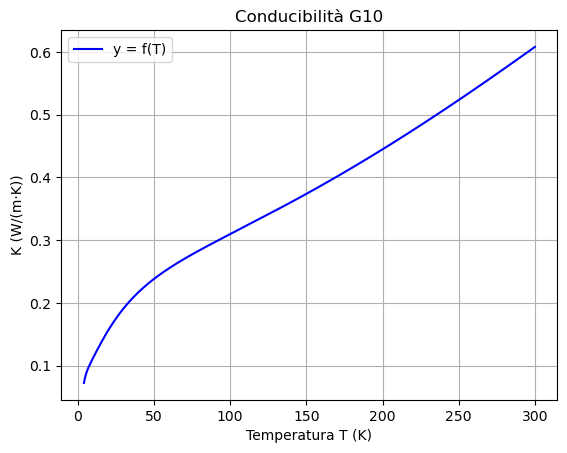

Q = 7.7194e-02 W


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = -4.1236
b = 13.788
c = -26.068
d = 26.272
e = -14.663
f = 4.4954
g = -0.6905
h = 0.0397
i = 0

# Funzione conducibilità vs Temperatura
def y(T):
    logT = np.log10(T)
    return (10**(a + b*logT + c*logT**2 + d*logT**3 + e*logT**4 + f*logT**5 + g*logT**6 + h*logT**7 + i*logT**8))

 # Funzione per l'integrazione
def integrand(T):
    return y(T)

def main() :

    #--------INTEGRALE DI CONDUCIBILITà----------------
    # estremi per l'integrazione
    T_min = 4.
    T_max = 55.

    # Controllo se gli estremi sono validi
    if T_min < 4 or T_max > 300:
        print("Errore: Gli estremi dell'integrazione devono essere compresi tra 4 K e 300 K.")
    else:
    # Calcolo dell'integrale solo se gli estremi sono validi
        integral_value, error = quad(integrand, T_min, T_max)
        print(f"L'integrale della funzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

    # Intervallo di temperatura (dal NIST)
    T_range = np.linspace(4, 300, 1000)

    # Valori di y calcolati
    y_values = y(T_range)

    # Plot della funzione
    plt.plot(T_range, y_values, label='y = f(T)', color='blue')
    plt.title('Conducibilità G10')
    plt.xlabel('Temperatura T (K)')
    plt.ylabel('K (W/(m·K))')
    plt.grid(True)
    plt.legend()
    plt.show()
    #plt.savefig("Carico_conduzione_g10_nist.png")



    #--------CONDUCIBILITà DA PARAMETRI GEOMETRICI
        # Caratteristiche geometriche cilindretti G10 
    diam = 8e-3
    l = 30e-3 # lunghezza cilindretti
    A = np.pi * (diam/2)**2
    n = 5 # numero di cilindretti


    # Calcolo di Q
    Q = A/l * integral_value * n        

    # Output del risultato
    print(f"Q = {Q:.4e} W")

if __name__ == "__main__": 
  main ()
